In [2]:
# Se importan las librerías necesarias
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Se configura xbgoost verbose para hacer seguimiento de la ejecución
xgb.set_config(verbosity=2)

In [3]:
# Se carga el conjunto de datos
print('Se carga el dataset.')
df = pd.read_excel('results/dataset.xlsx')

Se carga el dataset.


In [4]:
# Paso 1: Preparación de datos
# Tratar valores nulos
print('Se eliminan las filas con al menos 3 valores nulos.')
df = df.dropna(thresh=3)

Se eliminan las filas con al menos 3 valores nulos.


In [5]:
# Se realiza la codificación one-hot para las variables categóricas
print('Se transforman en dummies las variables categóricas.')
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

Se transforman en dummies las variables categóricas.


In [6]:
print('Se seleccionan los datos de los primeros 4 años (2013-2016)')
df_2013_2016 = df[(df['anio_ingreso'] >= 2013) & (df['anio_ingreso'] <= 2017)]

Se seleccionan los datos de los primeros 4 años (2013-2016)


In [7]:
# Dividir los datos en características (X) y variable objetivo (y)
print('Se separa el dataset en X e y.')
X = df_2013_2016.drop('abandono', axis=1)  # Características
y = df_2013_2016['abandono']  # Variable objetivo

Se separa el dataset en X e y.


In [8]:
print('Se borran las variables que ya no se utilizan por un tema de espacio.')
del df_2013_2016

Se borran las variables que ya no se utilizan por un tema de espacio.


In [9]:
# Paso 3: División en conjuntos de entrenamiento y prueba
print('Se separa en train y test el conjunto de entrenamiento.')
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

Se separa en train y test el conjunto de entrenamiento.


In [10]:
# Paso 4: Entrenamiento y evaluación del modelo
print('Se entrena el modelo.')
modelo = xgb.XGBClassifier(enable_categorical=True)
modelo.fit(X_entrenamiento, y_entrenamiento)

Se entrena el modelo.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
print('Se predice el conjunto de prueba y se calcula el accuracy.')
y_pred = modelo.predict(X_prueba)
precision = accuracy_score(y_prueba, y_pred)

Se predice el conjunto de prueba y se calcula el accuracy.


In [12]:
print(f"Precisión del modelo en el conjunto de prueba: {precision}")

Precisión del modelo en el conjunto de prueba: 0.7840524056923425


In [13]:
print("Ahora se prueba sobre los datos de los años siguientes: ")
dict_anios = {}

for anio in range(2017,2023):
    print(f'Predecimos los datos de la cohorte {anio}.')
    df_anio = df[(df['anio_ingreso'] == anio)]

    # Separamos X e y
    X_anio = df_anio.drop('abandono', axis=1)  # Características
    y_anio = df_anio['abandono']  # Variable objetivo

    y_pred_anio = modelo.predict(X_anio)

    precision_anio = accuracy_score(y_anio, y_pred_anio)
    dict_anios[anio] = precision_anio
    print(f"Precisión del modelo para los datos {anio}: {precision_anio}")


Ahora se prueba sobre los datos de los años siguientes: 
Predecimos los datos de la cohorte 2017.
Precisión del modelo para los datos 2017: 0.8321704695455403
Predecimos los datos de la cohorte 2018.
Precisión del modelo para los datos 2018: 0.7331081081081081
Predecimos los datos de la cohorte 2019.
Precisión del modelo para los datos 2019: 0.7556440903054449
Predecimos los datos de la cohorte 2020.
Precisión del modelo para los datos 2020: 0.7717550542045122
Predecimos los datos de la cohorte 2021.
Precisión del modelo para los datos 2021: 0.7255081766773651
Predecimos los datos de la cohorte 2022.
Precisión del modelo para los datos 2022: 0.7826626924987581


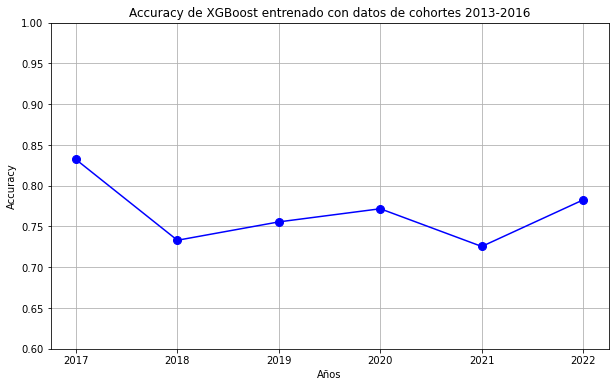

In [17]:
import matplotlib.pyplot as plt

# Separar las claves (años) y los valores (accuracy) en listas
years = list(dict_anios.keys())
accuracy = list(dict_anios.values())

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.plot(years, accuracy, marker='o', linestyle='-', color='b', markersize=8)  # Configuración del gráfico

# Establecer el rango del eje Y
plt.ylim(0.6, 1.0)

# Etiquetas de los ejes y título
plt.xlabel('Años')
plt.ylabel('Accuracy')
plt.title('Accuracy de XGBoost entrenado con datos de cohortes 2013-2016')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


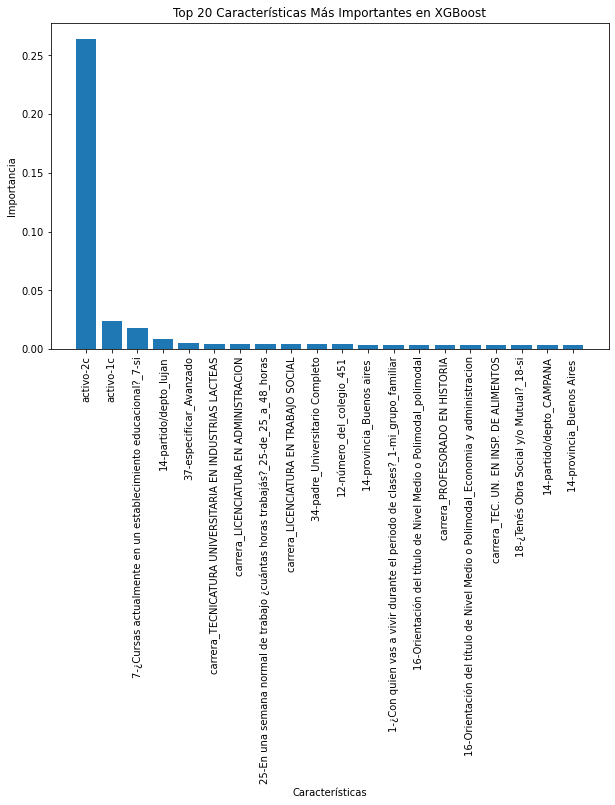

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Se obtiene la importancia de las características
feature_importance = modelo.feature_importances_

# Obtengo los índices de las 20 características más importantes
top_20_indices = np.argsort(feature_importance)[::-1][:20]
top_20_feature_names = [feature_names[i] for i in top_20_indices]

# Filtra las importancias y los nombres de las características para las 20 más importantes
top_20_feature_importance = [feature_importance[i] for i in top_20_indices]

# Crea un gráfico de barras para visualizar la importancia de las 20 características más importantes
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20_feature_importance)), top_20_feature_importance, tick_label=top_20_feature_names)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Top 20 características más importantes en la predicción')
plt.xticks(rotation=90)
plt.show()